In [1]:
import pandas as pd
import numpy as np
import requests
import json
import urllib
import os.path

In [2]:
link_f    = 'ml-latest-small/ml-latest-small/links.csv'
poster_pt = 'posters/'
download_posters = 9000

headers = {'Accept':'application/json'}
payload = {'api_key':'20047cd838219fb54d1f8fc32c45cda4'} ## api appiled from movie database
response = requests.get('http://api.themoviedb.org/3/configuration',params=payload,headers=headers)
response = json.loads(response.text)

base_url = response['images']['base_url']+'w185'

In [3]:
def get_poster(imdb,base_url):
    #query themovie.org API for movie poster path.
    file_path = ''
    imdb_id = 'tt0{0}'.format(imdb)
    movie_url = 'http://api.themoviedb.org/3/movie/{:}/images'.format(imdb_id)
    response = requests.get(movie_url,params=payload,headers=headers)
    try:
        file_path = json.loads(response.text)['posters'][0]['file_path']
    except:
        print('Failed to get url for imdb: {0}'.format(imdb))

    return base_url+file_path

In [4]:
df_id = pd.read_csv(link_f,sep=',')
idx_to_mv = {}
for row in df_id.itertuples():
    idx_to_mv[row[1]-1] = row[2]

mvs = [0]*len(idx_to_mv.keys())
for i in range(len(mvs)):
    if i in idx_to_mv.keys() and len(str(idx_to_mv[i])) == 6:
        mvs[i] = idx_to_mv[i]
mvs = list(filter(lambda imdb:imdb!=0,mvs))
mvs = mvs[:download_posters]
total_mvs = len(mvs)

In [5]:
#df_id = pd.read_csv(link_f,sep=',')
#idx_to_mv = {}
#for row in df_id.itertuples():
#    idx_to_mv[row[1]-1] = row[2]

#mvs = [0]*len(idx_to_mv.keys())
##for i in range(len(mvs)):
##    mvs[i] = idx_to_mv[i]
#mvs =df_id.imdbId
#mvs = list(filter(lambda imdb:imdb!=0,mvs))
#mvs = mvs[:download_posters]
#total_mvs = len(mvs)

In [6]:

movie=np.array(mvs)
print(mvs[31])


114746


In [7]:
URL = [0]*total_mvs
URL_IMDB = {'url':[],'imdb':[]}

i = 0
for m in mvs:
    if(os.path.exists(poster_pt+str(i)+'.jpg')):
        print('Skip downloading exists jpg: {0}.jpg'.format(poster_pt+str(i)))
        i += 1
        continue
    URL[i] = get_poster(m,base_url)
    if(URL[i] == base_url):
        print('Bad imdb id: {0}'.format(m))
        mvs.remove(m)
        continue
    print('No.{0}: Downloading jpg(imdb {1}) {2}'.format(i,m,URL[i]))
    urllib.request.urlretrieve(URL[i],poster_pt+str(i)+'.jpg')
    URL_IMDB['url'].append(URL[i])
    URL_IMDB['imdb'].append(m)
    i += 1

No.0: Downloading jpg(imdb 114709) http://image.tmdb.org/t/p/w185/uMZqKhT4YA6mqo2yczoznv7IDmv.jpg
No.1: Downloading jpg(imdb 113497) http://image.tmdb.org/t/p/w185/vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg
No.2: Downloading jpg(imdb 113228) http://image.tmdb.org/t/p/w185/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
No.3: Downloading jpg(imdb 114885) http://image.tmdb.org/t/p/w185/eT79mN6LqeDXeLiKwDGmW9Py9Xc.jpg
No.4: Downloading jpg(imdb 113041) http://image.tmdb.org/t/p/w185/e64sOI48hQXyru7naBFyssKFxVd.jpg
No.5: Downloading jpg(imdb 113277) http://image.tmdb.org/t/p/w185/zMyfPUelumio3tiDKPffaUpsQTD.jpg
No.6: Downloading jpg(imdb 114319) http://image.tmdb.org/t/p/w185/jQh15y5YB7bWz1NtffNZmRw0s9D.jpg
No.7: Downloading jpg(imdb 112302) http://image.tmdb.org/t/p/w185/sGO5Qa55p7wTu7FJcX4H4xIVKvS.jpg
No.8: Downloading jpg(imdb 114576) http://image.tmdb.org/t/p/w185/eoWvKD60lT95Ss1MYNgVExpo5iU.jpg
No.9: Downloading jpg(imdb 113189) http://image.tmdb.org/t/p/w185/iHCNmXH2tat0NMqtUpqDMWjcza8.jpg
No.10: Downloading j

No.83: Downloading jpg(imdb 113972) http://image.tmdb.org/t/p/w185/3kYcyD9yAjdjimYlIiGPfdMVbZb.jpg
No.84: Downloading jpg(imdb 117002) http://image.tmdb.org/t/p/w185/Oesh4pN5J2ing4flkgkiVdxILP.jpg
No.85: Downloading jpg(imdb 114825) http://image.tmdb.org/t/p/w185/bH1v8z12ZU7Y6zANgU1B00a86Co.jpg
No.86: Downloading jpg(imdb 115639) http://image.tmdb.org/t/p/w185/8leYqrAL6EubYjOCZuO6ELPdLYe.jpg
No.87: Downloading jpg(imdb 115759) http://image.tmdb.org/t/p/w185/avqUG5RYB93rwSUNL5r16Vtbc9g.jpg
No.88: Downloading jpg(imdb 113403) http://image.tmdb.org/t/p/w185/vFhc7Il7iS3RaNLJyy1vA5XLImT.jpg
No.89: Downloading jpg(imdb 113247) http://image.tmdb.org/t/p/w185/jTzBED0leGPwWDqNewye11qzJgd.jpg
No.90: Downloading jpg(imdb 111173) http://image.tmdb.org/t/p/w185/jdYL6f0KXnYBcnWnwGtnanJtKlE.jpg
No.91: Downloading jpg(imdb 113283) http://image.tmdb.org/t/p/w185/j9k3UTx7OZ0xoCws1oACYQZFF5N.jpg
No.92: Downloading jpg(imdb 115907) http://image.tmdb.org/t/p/w185/gRo3iGm7TQClcukkSh9oWQUY1Or.jpg
No.93: Down

No.166: Downloading jpg(imdb 114323) http://image.tmdb.org/t/p/w185/zH9R4ozP6bWsvMYkp4NptAjyJDn.jpg
No.167: Downloading jpg(imdb 114345) http://image.tmdb.org/t/p/w185/g46rChf49Qgq28RJ22iWwvsK7nO.jpg
No.168: Downloading jpg(imdb 114436) http://image.tmdb.org/t/p/w185/7O2SxrsXYaGFZ5cZgJF0Ab5SV5J.jpg
No.169: Downloading jpg(imdb 114478) http://image.tmdb.org/t/p/w185/dku3aLprH3j1ilSsubW9Pbgfe0y.jpg
No.170: Downloading jpg(imdb 114496) http://image.tmdb.org/t/p/w185/p9qioRaQblGXemFRQSwo8TpikVJ.jpg
No.171: Downloading jpg(imdb 114508) http://image.tmdb.org/t/p/w185/ePZmJlsLUajm3l7CyXW15srid6z.jpg
No.172: Downloading jpg(imdb 114558) http://image.tmdb.org/t/p/w185/rXvy5hG9OeVmgnv9w4IhQxhqEKD.jpg
No.173: Downloading jpg(imdb 114666) http://image.tmdb.org/t/p/w185/itztkKtF12lHGvQ7PDUYid1vovu.jpg
No.174: Downloading jpg(imdb 114663) http://image.tmdb.org/t/p/w185/dbayErlvmAlymq5zP4CBnG4L1R7.jpg
No.175: Downloading jpg(imdb 114702) http://image.tmdb.org/t/p/w185/9ihmgsX9aDXZmwjvgrzJgH8FxNa.jpg


No.248: Downloading jpg(imdb 113870) http://image.tmdb.org/t/p/w185/jPbBDALAjTQFzCl21ZKmhjSjEmD.jpg
No.249: Downloading jpg(imdb 110684) http://image.tmdb.org/t/p/w185/3mbJyBFsryL6wcSuEwHXvpzdOYa.jpg
No.250: Downloading jpg(imdb 110638) http://image.tmdb.org/t/p/w185/4XLF6QkUqMDL5SLDEw1nrpSMk8N.jpg
No.251: Downloading jpg(imdb 113967) http://image.tmdb.org/t/p/w185/8iD8XeGSimp6Dgc75GyIJefv4SY.jpg
No.252: Downloading jpg(imdb 106402) http://image.tmdb.org/t/p/w185/h7hwxnIC997ceboreSmEZo82bAw.jpg
No.253: Downloading jpg(imdb 110671) http://image.tmdb.org/t/p/w185/24f1paDywuI9FVEmT313Ze8oVHX.jpg
No.254: Downloading jpg(imdb 110632) http://image.tmdb.org/t/p/w185/pXvR4CDbosjtGE7onP02KUzB5BG.jpg
No.255: Downloading jpg(imdb 110737) http://image.tmdb.org/t/p/w185/jxjAcHGQRoeTHwVTdg5PNCgMbgh.jpg
No.256: Downloading jpg(imdb 110729) http://image.tmdb.org/t/p/w185/8QF48QS5lvtrhOclt22RFz3bSQm.jpg
No.257: Downloading jpg(imdb 114151) http://image.tmdb.org/t/p/w185/4PHKqg4kv39m6RGP2QTwTo2dbiY.jpg


No.330: Downloading jpg(imdb 110622) http://image.tmdb.org/t/p/w185/k3F8N3jeqXOpm1qjY7mL8O6vdx.jpg
No.331: Downloading jpg(imdb 110771) http://image.tmdb.org/t/p/w185/3FMfcgvjwgmyoT6Pp89wALzSUHT.jpg
No.332: Downloading jpg(imdb 110950) http://image.tmdb.org/t/p/w185/gbi7dmxPNVqJQpKnHOpZ9dmeWAO.jpg
No.333: Downloading jpg(imdb 105226) http://image.tmdb.org/t/p/w185/1qUuBCnz4JHAGzlQhO6JXvju471.jpg
No.334: Downloading jpg(imdb 110989) http://image.tmdb.org/t/p/w185/hbNmaqJcjg4ChZ5vvfQpNzizoiR.jpg
No.335: Downloading jpg(imdb 111054) http://image.tmdb.org/t/p/w185/3t8zDeD29iqjhz6k8OuvRizu8h.jpg
No.336: Downloading jpg(imdb 110997) http://image.tmdb.org/t/p/w185/8NFAQxZud5Kisw1sd9WxfBG54.jpg
No.337: Downloading jpg(imdb 111257) http://image.tmdb.org/t/p/w185/u5ZqizbcZ0RZhVqmu8lSU4SARBT.jpg
No.338: Downloading jpg(imdb 111256) http://image.tmdb.org/t/p/w185/nN5BPaG720jhkNf29Pogm1O1mq4.jpg
No.339: Downloading jpg(imdb 111438) http://image.tmdb.org/t/p/w185/q2ENMsGRUmoglHKPyOQe2fdy1cb.jpg
No.3

No.412: Downloading jpg(imdb 107151) http://image.tmdb.org/t/p/w185/zcm1tp34jNFbTltJhlr7bsvIvmh.jpg
No.413: Downloading jpg(imdb 110064) http://image.tmdb.org/t/p/w185/b6yh57uYZUvpYkH3RKL3ZIvoszl.jpg
No.414: Downloading jpg(imdb 110074) http://image.tmdb.org/t/p/w185/olViHNQHPy18SOJvbAI1bXUjHXI.jpg
No.415: Downloading jpg(imdb 110097) http://image.tmdb.org/t/p/w185/nTDUwFB9FlNxb6yMI6qJRPNrZcd.jpg
No.416: Downloading jpg(imdb 110123) http://image.tmdb.org/t/p/w185/j7306D476K6bIKKatGL7tLC26ro.jpg
No.417: Downloading jpg(imdb 107206) http://image.tmdb.org/t/p/w185/vXgWOXa7m3cEhOhYjR5q2UZCBBp.jpg
No.418: Downloading jpg(imdb 107207) http://image.tmdb.org/t/p/w185/22UfH59UppgMtDIMjD6DxhO8J2C.jpg
No.419: Downloading jpg(imdb 110137) http://image.tmdb.org/t/p/w185/uINVYNlnCbSLCkqveGwj7j4oFTf.jpg
No.420: Downloading jpg(imdb 108551) http://image.tmdb.org/t/p/w185/5Bl7O6zyv9Y1uWQ4gaCI2o7NrTE.jpg
No.421: Downloading jpg(imdb 107286) http://image.tmdb.org/t/p/w185/cmIet7MeJCnc0qDFf0yqDOLohR4.jpg


No.494: Downloading jpg(imdb 107779) http://image.tmdb.org/t/p/w185/aiJ6foo0jdOaJj3vnbxZTlI2JvX.jpg
No.495: Downloading jpg(imdb 110259) http://image.tmdb.org/t/p/w185/nKEwcGrTl0kWcFQlbrhciP8wYtK.jpg
No.496: Downloading jpg(imdb 114906) http://image.tmdb.org/t/p/w185/jvxLLHwpK52ZJUusd2RJv8oLHUJ.jpg
No.497: Downloading jpg(imdb 107002) http://image.tmdb.org/t/p/w185/iEDH8xmYdMnDDTxfbIZvcEO8Fs9.jpg
No.498: Downloading jpg(imdb 109403) http://image.tmdb.org/t/p/w185/j8Q7pQ27hvH54wpxJzIuQgQCdro.jpg
No.499: Downloading jpg(imdb 104029) http://image.tmdb.org/t/p/w185/6ZgqGgguuKU0Ba2aQOjzikbwnNQ.jpg
No.500: Downloading jpg(imdb 107315) http://image.tmdb.org/t/p/w185/qpMfsIMnt9c2KwaXdSKXWeII8a4.jpg
No.501: Downloading jpg(imdb 106408) http://image.tmdb.org/t/p/w185/zX5SNsEByf7YgPqyliI5xBjVgnc.jpg
No.502: Downloading jpg(imdb 110363) http://image.tmdb.org/t/p/w185/bch2eAwnwcs8k7ClaOg7uNoowqZ.jpg
No.503: Downloading jpg(imdb 111709) http://image.tmdb.org/t/p/w185/gByDzIrZrEjEbxvm2FIGg44Ic89.jpg


No.576: Downloading jpg(imdb 115851) http://image.tmdb.org/t/p/w185/l0RS3MQgW1nBJBAX3kl910c0AGo.jpg
No.577: Downloading jpg(imdb 116322) http://image.tmdb.org/t/p/w185/eq1JsckI4W8m0ozFglRLPkoopkZ.jpg
No.578: Downloading jpg(imdb 112817) http://image.tmdb.org/t/p/w185/zNhyeQ0LuM6wgIwQlCRhJJNBTfE.jpg
No.579: Downloading jpg(imdb 113362) http://image.tmdb.org/t/p/w185/uT9rty5z1lyI7C0ScwS7XPX0pZX.jpg
No.580: Downloading jpg(imdb 108500) http://image.tmdb.org/t/p/w185/lVsOeNfr04tlqigHAMsEPYLmLFl.jpg
No.581: Downloading jpg(imdb 117108) http://image.tmdb.org/t/p/w185/lFbBQ55MkBxVxQPwALjzMu3y9rD.jpg
No.582: Downloading jpg(imdb 118114) http://image.tmdb.org/t/p/w185/tWkYclnnChwoMMBFECsEjd5hb77.jpg
Failed to get url for imdb: 114103
Bad imdb id: 114103
No.583: Downloading jpg(imdb 115963) http://image.tmdb.org/t/p/w185/5QoAIazIjidUcnD4Vggvmvg42NW.jpg
No.584: Downloading jpg(imdb 116448) http://image.tmdb.org/t/p/w185/clPrQEzsOVs08MDMwNVFEtNXxJd.jpg
No.585: Downloading jpg(imdb 116827) http://i

No.657: Downloading jpg(imdb 115632) http://image.tmdb.org/t/p/w185/8hA5Fp1tl1MTKHfek8xgOmPDmrJ.jpg
No.658: Downloading jpg(imdb 117918) http://image.tmdb.org/t/p/w185/dS5OwlFbIy5nQMaY9B4gWLe5a05.jpg
No.659: Downloading jpg(imdb 104558) http://image.tmdb.org/t/p/w185/entsYeDr0LVMqWnnmu7CDGZA1fx.jpg
No.660: Downloading jpg(imdb 114936) http://image.tmdb.org/t/p/w185/l1k18GVC49LsfwSN1qmKL83otr3.jpg
No.661: Downloading jpg(imdb 114474) http://image.tmdb.org/t/p/w185/s9I3gLu9ySsfyM3JvlpSW9KrszF.jpg
No.662: Downloading jpg(imdb 115736) http://image.tmdb.org/t/p/w185/xfITNjW2sunPiB7BNotJJsCxhdA.jpg
No.663: Downloading jpg(imdb 115836) http://image.tmdb.org/t/p/w185/iF3exraajWgTwBXtjMKwfdyPXOj.jpg
No.664: Downloading jpg(imdb 116745) http://image.tmdb.org/t/p/w185/fer4sGAUAFlRFZBn9l7tF1Y75uX.jpg
No.665: Downloading jpg(imdb 119214) http://image.tmdb.org/t/p/w185/blNI9KqOM7YPULEnOCcOS1cIvW7.jpg
No.666: Downloading jpg(imdb 109066) http://image.tmdb.org/t/p/w185/lUinSrxJ74XeZkcvivcIXK4HMDx.jpg


No.739: Downloading jpg(imdb 118147) http://image.tmdb.org/t/p/w185/wAw3KIEuQGIwhCBWtvWFQRItz0d.jpg
No.740: Downloading jpg(imdb 108598) http://image.tmdb.org/t/p/w185/xT2NxRbqnTXYqoVQvKSmkLEm4lE.jpg
No.741: Downloading jpg(imdb 109781) http://image.tmdb.org/t/p/w185/xtE5E17TrF2ouYWwPK2GXqII758.jpg
No.742: Downloading jpg(imdb 110521) http://image.tmdb.org/t/p/w185/eSVhYvv822QJVFhTQblTJT9KeZc.jpg
No.743: Downloading jpg(imdb 115715) http://image.tmdb.org/t/p/w185/l4dBLjL55nlHglvasj3kSLoxaTV.jpg
No.744: Downloading jpg(imdb 116059) http://image.tmdb.org/t/p/w185/AtIPkAYiQ3GrrX2feGj51NOXs5c.jpg
No.745: Downloading jpg(imdb 115610) http://image.tmdb.org/t/p/w185/ivjPm80ZT4MXO1DifALrP0GkOBZ.jpg
No.746: Downloading jpg(imdb 103850) http://image.tmdb.org/t/p/w185/gDJt4SGJQ0c2wCyDVghCRoRMxgo.jpg
No.747: Downloading jpg(imdb 109942) http://image.tmdb.org/t/p/w185/ga5rXdPnL0gcglMAIvOy7VayBGk.jpg
No.748: Downloading jpg(imdb 101700) http://image.tmdb.org/t/p/w185/13ohaCQhOwQrqXeW2nWe922nCzR.jpg


No.821: Downloading jpg(imdb 117038) http://image.tmdb.org/t/p/w185/xof1HmoI3NrSrmzHByjK6W7dU8E.jpg
No.822: Downloading jpg(imdb 116240) http://image.tmdb.org/t/p/w185/oU0Y04XTz4lPf3il6i4SCK1bLPa.jpg
No.823: Downloading jpg(imdb 116477) http://image.tmdb.org/t/p/w185/gApBWTMD5N8UVClI7rcqwf6dIrB.jpg
No.824: Downloading jpg(imdb 118163) http://image.tmdb.org/t/p/w185/bdQysMSn1A7PwXPTkxAEWXwurIr.jpg
No.825: Downloading jpg(imdb 117091) http://image.tmdb.org/t/p/w185/pPddQHUBu0IXXLEXC77vYo0rsOj.jpg
No.826: Downloading jpg(imdb 118100) http://image.tmdb.org/t/p/w185/xP3ZftHUF5k004hNvWKk9iMn65K.jpg
No.827: Downloading jpg(imdb 116250) http://image.tmdb.org/t/p/w185/7uYGJTxaeCtek6afNLPCuYCyiV4.jpg
No.828: Downloading jpg(imdb 117364) http://image.tmdb.org/t/p/w185/zlLJzljL13sMTIhyn5IdogHFPTa.jpg
No.829: Downloading jpg(imdb 117028) http://image.tmdb.org/t/p/w185/vdpNpmeJh3A3CtlkvHuy7m9NlER.jpg
No.830: Downloading jpg(imdb 119731) http://image.tmdb.org/t/p/w185/9xH3zr5QLqY0MyyEO584zBDbw6f.jpg


No.903: Downloading jpg(imdb 117615) http://image.tmdb.org/t/p/w185/y5JpbVaZLNyHobodZNJsNQlRs1N.jpg
No.904: Downloading jpg(imdb 120394) http://image.tmdb.org/t/p/w185/kzvxxJ8qeL1xOJBWtMr7Lx1JxWv.jpg
No.905: Downloading jpg(imdb 118556) http://image.tmdb.org/t/p/w185/ed6nD7h9sbojSWY2qrnDcSvDFko.jpg
No.906: Downloading jpg(imdb 115744) http://image.tmdb.org/t/p/w185/kyPCqLAexOhPr0LV4yXvKlJ68cC.jpg
No.907: Downloading jpg(imdb 118964) http://image.tmdb.org/t/p/w185/ygEvgamjD6ghRPjSqy8WgJFCvbc.jpg
No.908: Downloading jpg(imdb 119567) http://image.tmdb.org/t/p/w185/u1fXmEQUCI9CjyHCCYOPBSq2DYo.jpg
No.909: Downloading jpg(imdb 117359) http://image.tmdb.org/t/p/w185/32289bKHzGO4lyD8lUUIFYA5e5R.jpg
No.910: Downloading jpg(imdb 117561) http://image.tmdb.org/t/p/w185/156vzm8uQBYGZvzExyc4LK1mgyo.jpg
No.911: Downloading jpg(imdb 114303) http://image.tmdb.org/t/p/w185/wXoV64GylOK8xKNgwe3msc4ZeGi.jpg
No.912: Downloading jpg(imdb 120373) http://image.tmdb.org/t/p/w185/keoDvl8npf8HpZdiNqKbqTeyJOn.jpg


No.985: Downloading jpg(imdb 120539) http://image.tmdb.org/t/p/w185/np95YMmxTJRBcaAXa4TYzcwwNw5.jpg
No.986: Downloading jpg(imdb 119177) http://image.tmdb.org/t/p/w185/7Gj1i9ajRPB9puaHrxKxjmclRQY.jpg
No.987: Downloading jpg(imdb 119095) http://image.tmdb.org/t/p/w185/mB0KF5T2s6raTjiV676Umd8ciE0.jpg
No.988: Downloading jpg(imdb 119891) http://image.tmdb.org/t/p/w185/1V9Yw4hz0PHyY1T4ry8ARuivYxw.jpg
No.989: Downloading jpg(imdb 120529) http://image.tmdb.org/t/p/w185/sGHc7UZSrWyMMRHfZfEwT5eJw5T.jpg
No.990: Downloading jpg(imdb 119535) http://image.tmdb.org/t/p/w185/tk7WNEwLZepFU2yPIIkRuQOO0Q9.jpg
No.991: Downloading jpg(imdb 119080) http://image.tmdb.org/t/p/w185/33yTPcGSv7eo3FVlb7XKACHl1M8.jpg
No.992: Downloading jpg(imdb 119210) http://image.tmdb.org/t/p/w185/cGUECqzHTEmzfMmvqDAG7wI6reQ.jpg
No.993: Downloading jpg(imdb 118689) http://image.tmdb.org/t/p/w185/pKGGzotqkNDEL2ix4VU1bWmteK5.jpg
No.994: Downloading jpg(imdb 119592) http://image.tmdb.org/t/p/w185/3aBKgBnqzg3ZUpGCHXzlVs2xINU.jpg


No.1067: Downloading jpg(imdb 112619) http://image.tmdb.org/t/p/w185/gvBk8QYjIyeWZgIMOFatnzvezk5.jpg
No.1068: Downloading jpg(imdb 140282) http://image.tmdb.org/t/p/w185/7eK3k2BxpIfOH8cFm4mJpRb4uBh.jpg
No.1069: Downloading jpg(imdb 120661) http://image.tmdb.org/t/p/w185/jZxTpFz6mbJrr3Y8pjK6TnBWBgE.jpg
No.1070: Downloading jpg(imdb 118744) http://image.tmdb.org/t/p/w185/wg4QwknfZag1sg7M2biuLJoXAks.jpg
No.1071: Downloading jpg(imdb 120241) http://image.tmdb.org/t/p/w185/c9T1jNEik3PjAQI70hx6Kwt6N0p.jpg
No.1072: Downloading jpg(imdb 120744) http://image.tmdb.org/t/p/w185/5YA8brn5zSGYo74XXmneXCwYxER.jpg
No.1073: Downloading jpg(imdb 120769) http://image.tmdb.org/t/p/w185/yoDlDqwp83p8mc0sylVPlbKnVDy.jpg
No.1074: Downloading jpg(imdb 120890) http://image.tmdb.org/t/p/w185/dI9iYo1cL81yzJkBVyNGipjSvy0.jpg
No.1075: Downloading jpg(imdb 125454) http://image.tmdb.org/t/p/w185/dokDvch0PVKN8Ac9S2xzhrXjFZ2.jpg
No.1076: Downloading jpg(imdb 120642) http://image.tmdb.org/t/p/w185/a1TJ0Cm1p7SWksvrn2wtQU

No.1148: Downloading jpg(imdb 122718) http://image.tmdb.org/t/p/w185/l5laJWvcxgkoqC3nRPs9N5u55jR.jpg
No.1149: Downloading jpg(imdb 138704) http://image.tmdb.org/t/p/w185/d4pDorUHjIVFiVGiJar6sF2r8TQ.jpg
No.1150: Downloading jpg(imdb 140688) http://image.tmdb.org/t/p/w185/dkVIN6LND6vTCw0MTnuRAbcEXJn.jpg
No.1151: Downloading jpg(imdb 129387) http://image.tmdb.org/t/p/w185/ugIAW8yQnoV8t7fEfYM204WUTYM.jpg
No.1152: Downloading jpg(imdb 100142) http://image.tmdb.org/t/p/w185/852ZwTRj9tRxkGOT0Pu0Ep8yimk.jpg
No.1153: Downloading jpg(imdb 101917) http://image.tmdb.org/t/p/w185/m4IFNmheHcjbLsVWbUq9TIpWL5S.jpg
No.1154: Downloading jpg(imdb 105179) http://image.tmdb.org/t/p/w185/tjq1iWClSBCfi3SjpVJblOU6q4F.jpg
No.1155: Downloading jpg(imdb 103956) http://image.tmdb.org/t/p/w185/pDko1kIkrCaHBSfBj7pAJu1Diss.jpg
No.1156: Downloading jpg(imdb 104714) http://image.tmdb.org/t/p/w185/pr5RcT2TdJ09PkETdhRiwixf8PW.jpg
No.1157: Downloading jpg(imdb 120746) http://image.tmdb.org/t/p/w185/eh59q4ksXDQc97s52FUUQO

No.1230: Downloading jpg(imdb 120835) http://image.tmdb.org/t/p/w185/gdHuZl5pbHN8xOyapiozZ1CWuzg.jpg
No.1231: Downloading jpg(imdb 122690) http://image.tmdb.org/t/p/w185/jw4SbehUSkWQZ2znDHEXUO9g6ZT.jpg
No.1232: Downloading jpg(imdb 146336) http://image.tmdb.org/t/p/w185/2oIf0ibr0zlhuhgbOwFSHimh7P6.jpg
No.1233: Downloading jpg(imdb 118863) http://image.tmdb.org/t/p/w185/titlFNXp9nATuiyOr0Q3QCKW7IW.jpg
No.1234: Downloading jpg(imdb 126604) http://image.tmdb.org/t/p/w185/zU37bUEGBuX7c7j6l04lMyn2M0m.jpg
No.1235: Downloading jpg(imdb 100594) http://image.tmdb.org/t/p/w185/tT0YkWpOYM8YpG8GTJQ2qXjhqRa.jpg
No.1236: Downloading jpg(imdb 109206) http://image.tmdb.org/t/p/w185/ky2ebf9eEb3LbkxNlc9oo97kYbY.jpg
No.1237: Downloading jpg(imdb 105151) http://image.tmdb.org/t/p/w185/g20oPyKrX317mRpOV5skpdQqf3p.jpg
No.1238: Downloading jpg(imdb 117276) http://image.tmdb.org/t/p/w185/eaQDlBPTdvgWkr7jxzlKd5pBd4u.jpg
No.1239: Downloading jpg(imdb 120587) http://image.tmdb.org/t/p/w185/qzUtFbyyh47hJAToQ6cvii

No.1312: Downloading jpg(imdb 132512) http://image.tmdb.org/t/p/w185/3noBOQroTjMWAYhlku95Y06v5C5.jpg
No.1313: Downloading jpg(imdb 120710) http://image.tmdb.org/t/p/w185/k4d5K7pH7Ie7Tg7hGBfkt22Hj1P.jpg
No.1314: Downloading jpg(imdb 139699) http://image.tmdb.org/t/p/w185/nnVA3Nmry9furen0NDmJa0QTn2F.jpg
No.1315: Downloading jpg(imdb 120458) http://image.tmdb.org/t/p/w185/5Np88iigCfnXvMlMKmCcbPVIbYQ.jpg
No.1316: Downloading jpg(imdb 110978) http://image.tmdb.org/t/p/w185/6ECWpYiwEdWi2OTSbyzLV281YJ.jpg
No.1317: Downloading jpg(imdb 120683) http://image.tmdb.org/t/p/w185/1zIyN4jabvK4fPyWOiV3PQLs7Fa.jpg
No.1318: Downloading jpg(imdb 151691) http://image.tmdb.org/t/p/w185/xYmvTQGUr1fSWc2GpoVC4sOuAO5.jpg
No.1319: Downloading jpg(imdb 149151) http://image.tmdb.org/t/p/w185/xCIPFFTSr84SxiU8BaEmpVxDCNZ.jpg
No.1320: Downloading jpg(imdb 112922) http://image.tmdb.org/t/p/w185/jLhH82Bb5dqAa6DddrehXD5tiNY.jpg
No.1321: Downloading jpg(imdb 160862) http://image.tmdb.org/t/p/w185/2kWpjQ3O6DZywdIoPlvXCk3

No.1394: Downloading jpg(imdb 118826) http://image.tmdb.org/t/p/w185/lvzFyEoojIMOgsZyl3HYDApti43.jpg
No.1395: Downloading jpg(imdb 120865) http://image.tmdb.org/t/p/w185/zsshQg6eGxrjqZ93NHVl6ZjIYSu.jpg
No.1396: Downloading jpg(imdb 115005) http://image.tmdb.org/t/p/w185/28np7A5oXfT6jK1zRk1SbSgsniX.jpg
No.1397: Downloading jpg(imdb 140379) http://image.tmdb.org/t/p/w185/2pWSszXVEPPClWzy8yir1FVEveN.jpg
No.1398: Downloading jpg(imdb 165078) http://image.tmdb.org/t/p/w185/aN3DK9CF5KhoZgR386kRwvA74MW.jpg
No.1399: Downloading jpg(imdb 115693) http://image.tmdb.org/t/p/w185/8WC5elsMSUSKKKOTub2jjY2k4w3.jpg
No.1400: Downloading jpg(imdb 138414) http://image.tmdb.org/t/p/w185/vIVVXUG2l8rb8xvhXJazPV6yyrw.jpg
No.1401: Downloading jpg(imdb 120659) http://image.tmdb.org/t/p/w185/aFOOg7ymKbdwfgtbWOvSbrKp5WL.jpg
No.1402: Downloading jpg(imdb 120915) http://image.tmdb.org/t/p/w185/n8V09dDc02KsSN6Q4hC2BX6hN8X.jpg
No.1403: Downloading jpg(imdb 166252) http://image.tmdb.org/t/p/w185/fzu0xVGfi0yGEtAgVv8WoT

No.1476: Downloading jpg(imdb 181733) http://image.tmdb.org/t/p/w185/6LNzYl7oH9ui7baYbo0UG9if8rJ.jpg
No.1477: Downloading jpg(imdb 120657) http://image.tmdb.org/t/p/w185/ooR8S0O0ZgxK2OBnT1GWHrr9w92.jpg
No.1478: Downloading jpg(imdb 138304) http://image.tmdb.org/t/p/w185/2zm3a3453aWN078Qd6nIQngbEkM.jpg
No.1479: Downloading jpg(imdb 160236) http://image.tmdb.org/t/p/w185/4LP5BieqdFNlCFjxsvaA3d6hGGd.jpg
No.1480: Downloading jpg(imdb 164108) http://image.tmdb.org/t/p/w185/qRzsimNz0eDyFLFJcbVLIxlqii.jpg
No.1481: Downloading jpg(imdb 144286) http://image.tmdb.org/t/p/w185/c5qXIOYoHrcg1ds9ZG7fnSHA19n.jpg
No.1482: Downloading jpg(imdb 163579) http://image.tmdb.org/t/p/w185/Teyo0W5euwLChQvFT0NQDfbvcQ.jpg
No.1483: Downloading jpg(imdb 125971) http://image.tmdb.org/t/p/w185/9zQMVhYgJkklEyDCMee6QbizxFG.jpg
No.1484: Downloading jpg(imdb 126810) http://image.tmdb.org/t/p/w185/w4LupVVyui6O6MuzoyXOr5sX0Yk.jpg
No.1485: Downloading jpg(imdb 157183) http://image.tmdb.org/t/p/w185/eGGr0gmolrORtPB1zbr58dFx

No.1558: Downloading jpg(imdb 120655) http://image.tmdb.org/t/p/w185/zuJJAEvyiZiddzRx7JRGNDzjP07.jpg
No.1559: Downloading jpg(imdb 151137) http://image.tmdb.org/t/p/w185/3XCzDTqh4X5YHxwys0IOpDyi7ly.jpg
No.1560: Downloading jpg(imdb 190641) http://image.tmdb.org/t/p/w185/aalTziefHGUVLg44iyWS8B7ee5u.jpg
No.1561: Downloading jpg(imdb 165773) http://image.tmdb.org/t/p/w185/itqEwiINuYvaqvFKw5YWitnqAUc.jpg
No.1562: Downloading jpg(imdb 118150) http://image.tmdb.org/t/p/w185/l4jVox6cJmcD5AbTAjZljyq8ZlS.jpg
No.1563: Downloading jpg(imdb 101605) http://image.tmdb.org/t/p/w185/5d5lxBhrvU77X3SleY4DcQxiSPp.jpg
No.1564: Downloading jpg(imdb 105156) http://image.tmdb.org/t/p/w185/wYLMeaAgOcTPYyEsz1bsCN20EzU.jpg
No.1565: Downloading jpg(imdb 119908) http://image.tmdb.org/t/p/w185/zoJYW6qDORHWctx6vC4HgyRKBOk.jpg
No.1566: Downloading jpg(imdb 164312) http://image.tmdb.org/t/p/w185/5KssrRE79Z23ZuGnmVHpPNYuFty.jpg
No.1567: Downloading jpg(imdb 165859) http://image.tmdb.org/t/p/w185/o9lUIJWeSWGtgw9xVH1Gtp

No.1640: Downloading jpg(imdb 104070) http://image.tmdb.org/t/p/w185/qNIkecw9i44ljTJaMfkdeyLc4vB.jpg
No.1641: Downloading jpg(imdb 104231) http://image.tmdb.org/t/p/w185/yNdfm55jkgFk1IeAqxSEPFDPR5x.jpg
No.1642: Downloading jpg(imdb 104454) http://image.tmdb.org/t/p/w185/wiyMO1t2odb1UxHTiGzUjlYj8kj.jpg
No.1643: Downloading jpg(imdb 105415) http://image.tmdb.org/t/p/w185/lnZ8W60Cjd3EWs7ty6rJk1K1Qiw.jpg
No.1644: Downloading jpg(imdb 105665) http://image.tmdb.org/t/p/w185/tOQekTHJmVCgfUYXTb6dLAu6l8W.jpg
No.1645: Downloading jpg(imdb 105812) http://image.tmdb.org/t/p/w185/jjJeKKUkVEol0DURWbuOeG3fD98.jpg
No.1646: Downloading jpg(imdb 103893) http://image.tmdb.org/t/p/w185/r0feHChsxNVMpqwT6Wk9GIJxs2n.jpg
No.1647: Downloading jpg(imdb 104684) http://image.tmdb.org/t/p/w185/pH1w6HQIxVqvx40dcUJIvFJb0D2.jpg
No.1648: Downloading jpg(imdb 103905) http://image.tmdb.org/t/p/w185/noCxjrCok0HtSxrAc0yWx5zSBpe.jpg
No.1649: Downloading jpg(imdb 104815) http://image.tmdb.org/t/p/w185/4S47gyKZI5aLiawwc45e4g

No.1722: Downloading jpg(imdb 119062) http://image.tmdb.org/t/p/w185/pdvhVK5gglsFRoejBtzKDaMQdEH.jpg
No.1723: Downloading jpg(imdb 102713) http://image.tmdb.org/t/p/w185/pstlHVvLHV9WWU3mgxn5WMKBVX9.jpg
No.1724: Downloading jpg(imdb 191754) http://image.tmdb.org/t/p/w185/qTrrElHcONoix4hb4IpLiqEnjlb.jpg
No.1725: Downloading jpg(imdb 144084) http://image.tmdb.org/t/p/w185/qXsylPM4Lr5397R3eHrfqHhTUNc.jpg
No.1726: Downloading jpg(imdb 171433) http://image.tmdb.org/t/p/w185/wbW4OnSNcuywgmJFdlvL8SvHx4.jpg
No.1727: Downloading jpg(imdb 149367) http://image.tmdb.org/t/p/w185/pgSr9HQXKPGoCIjNCnFTnImlPiQ.jpg
No.1728: Downloading jpg(imdb 166175) http://image.tmdb.org/t/p/w185/wZaIFzgnsfFj50df20W1eDHmI44.jpg
No.1729: Downloading jpg(imdb 236216) http://image.tmdb.org/t/p/w185/8Mjyt4I3jFDuej8Y3CG2HAfQ0CB.jpg
No.1730: Downloading jpg(imdb 160644) http://image.tmdb.org/t/p/w185/7iULgcGX8b910JUx90aAB7RWC7F.jpg
No.1731: Downloading jpg(imdb 102898) http://image.tmdb.org/t/p/w185/nfTWQ7GfH462FVmYEGQB1oH

No.1804: Downloading jpg(imdb 120903) http://image.tmdb.org/t/p/w185/hJ09SIDACUvRg3RLQRT2jUfDy7W.jpg
No.1805: Downloading jpg(imdb 200530) http://image.tmdb.org/t/p/w185/1WhN17BjEMc3qfKmJvYypYXE86G.jpg
No.1806: Downloading jpg(imdb 168794) http://image.tmdb.org/t/p/w185/nayrAf0D4uVV4RUGM57ZI9aFf59.jpg
No.1807: Downloading jpg(imdb 161081) http://image.tmdb.org/t/p/w185/A1mrfm8LEv7L28q50ld8QI5z9Iu.jpg
No.1808: Downloading jpg(imdb 210234) http://image.tmdb.org/t/p/w185/jrwTeoEHCmFEr0J9HENdPAR3dEq.jpg
No.1809: Downloading jpg(imdb 205735) http://image.tmdb.org/t/p/w185/9l97jSu2O6jnhSXiqYROWVsXH63.jpg
No.1810: Downloading jpg(imdb 104299) http://image.tmdb.org/t/p/w185/qS3AfhwDLVpZVOr80kNxPHIv8gE.jpg
No.1811: Downloading jpg(imdb 103241) http://image.tmdb.org/t/p/w185/fopJnM6MCZilYM6nRpglWdFndt1.jpg
No.1812: Downloading jpg(imdb 105813) http://image.tmdb.org/t/p/w185/7XderqM5oxzbWanJq6FLvpmFLdA.jpg
No.1813: Downloading jpg(imdb 205461) http://image.tmdb.org/t/p/w185/jxG520Lc2QFfP2RwRU7Kfn

No.1886: Downloading jpg(imdb 223897) http://image.tmdb.org/t/p/w185/cDTbOPqbDeItp2kqfVJBOsI9mQs.jpg
No.1887: Downloading jpg(imdb 111512) http://image.tmdb.org/t/p/w185/gTUrOvD1j7g2T7OtRHG0fHE8kaB.jpg
No.1888: Downloading jpg(imdb 229260) http://image.tmdb.org/t/p/w185/eO0KHmjR4SIVMilUT0cXgjQ6Dqp.jpg
No.1889: Downloading jpg(imdb 219952) http://image.tmdb.org/t/p/w185/gT7MqsLVUYYRDeBXTvhnJgPxgM3.jpg
No.1890: Downloading jpg(imdb 192949) http://image.tmdb.org/t/p/w185/lnXmIv1tqsFJ0W9vrfRPmQWChIu.jpg
No.1891: Downloading jpg(imdb 160127) http://image.tmdb.org/t/p/w185/eBzf9d09Vgq2HSVC4fIZm1QNQd.jpg
No.1892: Downloading jpg(imdb 146984) http://image.tmdb.org/t/p/w185/eNEsOEZFOstd1iXTtimbU8qsjDD.jpg
No.1893: Downloading jpg(imdb 185431) http://image.tmdb.org/t/p/w185/ijfKqbZoZQjer5Oiolxy7hn8L92.jpg
No.1894: Downloading jpg(imdb 203019) http://image.tmdb.org/t/p/w185/wNUAnXV1mzOOfvnVBIYsalkk078.jpg
No.1895: Downloading jpg(imdb 199753) http://image.tmdb.org/t/p/w185/sMholOUc89LQhp0X33JZExg

No.1968: Downloading jpg(imdb 236447) http://image.tmdb.org/t/p/w185/t9qnhcengitxfefj4EpDKYjtkQe.jpg
No.1969: Downloading jpg(imdb 220157) http://image.tmdb.org/t/p/w185/k7ztbOglrUG3kRLB98QwwwOZhej.jpg
No.1970: Downloading jpg(imdb 116447) http://image.tmdb.org/t/p/w185/vN29m7Rfkhe6HW8mTYd5SMc2D3b.jpg
No.1971: Downloading jpg(imdb 100842) http://image.tmdb.org/t/p/w185/ybcKcM6NVhKZEzwuyLkpQPd3twH.jpg
No.1972: Downloading jpg(imdb 101764) http://image.tmdb.org/t/p/w185/sRxg7BI6y5dXa5SX0RZS3zlhxwc.jpg
No.1973: Downloading jpg(imdb 102005) http://image.tmdb.org/t/p/w185/5XbXGm2AAXWpvuuqxWDy1yFXEKG.jpg
No.1974: Downloading jpg(imdb 100140) http://image.tmdb.org/t/p/w185/tNsXSCYB9UVeznlKjgFPoLt5eke.jpg
No.1975: Downloading jpg(imdb 100232) http://image.tmdb.org/t/p/w185/sk3O6dldApuYz2RyYnJz86NWyIU.jpg
No.1976: Downloading jpg(imdb 127952) http://image.tmdb.org/t/p/w185/zewyQhl9qyqGiXPC36fEZ5D4TEL.jpg
No.1977: Downloading jpg(imdb 100486) http://image.tmdb.org/t/p/w185/7n8Rl18eWdR1r7xRJWBPzf

No.2049: Downloading jpg(imdb 249380) http://image.tmdb.org/t/p/w185/sLvsIgWMH9bV1IZnZOzY5dXKUHe.jpg
No.2050: Downloading jpg(imdb 224578) http://image.tmdb.org/t/p/w185/7bSt7bSWtfXCrPFnZrUFLr3oq53.jpg
No.2051: Downloading jpg(imdb 105378) http://image.tmdb.org/t/p/w185/8ggla5zLZhbaobL6U9IYvfiQ7yr.jpg
No.2052: Downloading jpg(imdb 163862) http://image.tmdb.org/t/p/w185/egcU3qvPPTrfO0Mc4LGlAVAgAxs.jpg
No.2053: Downloading jpg(imdb 173840) http://image.tmdb.org/t/p/w185/7BNaJZfJdahhdBXlTJMccTR6Sdi.jpg
No.2054: Downloading jpg(imdb 250494) http://image.tmdb.org/t/p/w185/1gAnkZNAd3HqgWL7aqSOQFwt7D1.jpg
No.2055: Downloading jpg(imdb 227445) http://image.tmdb.org/t/p/w185/dNWZZxtY1pgseuT4wYexNYjirDF.jpg
No.2056: Downloading jpg(imdb 242193) http://image.tmdb.org/t/p/w185/3l2mMLVj2CFjaRe6EqbGPPYjuaT.jpg
No.2057: Downloading jpg(imdb 273300) http://image.tmdb.org/t/p/w185/8k7gR1scAI2onir2ygkizIgv1Gi.jpg
No.2058: Downloading jpg(imdb 227005) http://image.tmdb.org/t/p/w185/4EprGJdGQSu16HxpwjkvpM

No.2131: Downloading jpg(imdb 108148) http://image.tmdb.org/t/p/w185/xn1RwKmUC1eDoZi8IrzyUcHJANw.jpg
No.2132: Downloading jpg(imdb 166924) http://image.tmdb.org/t/p/w185/tVxGt7uffLVhIIcwuldXOMpFBPX.jpg
No.2133: Downloading jpg(imdb 206963) http://image.tmdb.org/t/p/w185/uTeM8PA8eawwxcJskcvkmhMID8Z.jpg
No.2134: Downloading jpg(imdb 245501) http://image.tmdb.org/t/p/w185/mN0ST5kAiJdEUPqRFIaSDpYvWyF.jpg
No.2135: Downloading jpg(imdb 119682) http://image.tmdb.org/t/p/w185/qVCbs4lO0b5Sj1RpH03gD2GBVYU.jpg
No.2136: Downloading jpg(imdb 102555) http://image.tmdb.org/t/p/w185/iyb7l2CFWohEym23ES8FRlq0lTi.jpg
No.2137: Downloading jpg(imdb 120681) http://image.tmdb.org/t/p/w185/f3J77Cy3pRSeeN52Pk8oIvgi6IN.jpg
No.2138: Downloading jpg(imdb 272020) http://image.tmdb.org/t/p/w185/tfbZvbK3mVNcgsYwC0Npj96GRux.jpg
No.2139: Downloading jpg(imdb 200027) http://image.tmdb.org/t/p/w185/m8sA3GNlEnrtK5Xlvsn2WRHp2qv.jpg
No.2140: Downloading jpg(imdb 243017) http://image.tmdb.org/t/p/w185/dHQDhjt84ViDH0DhFm5PSy

No.2213: Downloading jpg(imdb 106223) http://image.tmdb.org/t/p/w185/sQCgGyG1Es85p4wXdcBnmqzn3mF.jpg
No.2214: Downloading jpg(imdb 240900) http://image.tmdb.org/t/p/w185/9W6tiYZZTB45ZyWpoceBSc4Ln9y.jpg
No.2215: Downloading jpg(imdb 188453) http://image.tmdb.org/t/p/w185/34ps7KL4l3yXeoNnC7vXsIBgZfJ.jpg
No.2216: Downloading jpg(imdb 295552) http://image.tmdb.org/t/p/w185/3eZ5bELx5pl05UufRAshUzIGV2T.jpg
No.2217: Downloading jpg(imdb 265298) http://image.tmdb.org/t/p/w185/zpySeXpqmMXp9Fs6Znjkjs0Nzti.jpg
No.2218: Downloading jpg(imdb 233469) http://image.tmdb.org/t/p/w185/bqb5cq5CnbHov3HPwsBmPzTtDyw.jpg
No.2219: Downloading jpg(imdb 246894) http://image.tmdb.org/t/p/w185/5Wquo3EjfDpK7S1BHcybuC3TZDO.jpg
No.2220: Downloading jpg(imdb 265713) http://image.tmdb.org/t/p/w185/z6AOb26at7WwQygeyijrpNqqtVR.jpg
No.2221: Downloading jpg(imdb 109190) http://image.tmdb.org/t/p/w185/21U2jwl36hoTHsXB3fDuIQkcchu.jpg
No.2222: Downloading jpg(imdb 107985) http://image.tmdb.org/t/p/w185/vyfinDLt7gc0wwTRFVBKc8

No.2294: Downloading jpg(imdb 276751) http://image.tmdb.org/t/p/w185/4ts3SBMGu0wFmHgddtaxCa5EhO8.jpg
No.2295: Downloading jpg(imdb 121765) http://image.tmdb.org/t/p/w185/2vcNFtrZXNwIcBgH5e2xXCmVR8t.jpg
No.2296: Downloading jpg(imdb 247199) http://image.tmdb.org/t/p/w185/ziXye4ih6Hd7jOezr5KUQw8I8G8.jpg
No.2297: Downloading jpg(imdb 278500) http://image.tmdb.org/t/p/w185/iVqEDU10zyQis5l2P6cJR8SI38O.jpg
No.2298: Downloading jpg(imdb 278435) http://image.tmdb.org/t/p/w185/la9F1MVu1nU4v61trp80dVcr5Ij.jpg
No.2299: Downloading jpg(imdb 278504) http://image.tmdb.org/t/p/w185/zb0D3vfjcPFvuyHp1mFPOIcYJWH.jpg
No.2300: Downloading jpg(imdb 166813) http://image.tmdb.org/t/p/w185/nhrcR2KtVjXxJNSrPvcxVSyEf4c.jpg
No.2301: Downloading jpg(imdb 268690) http://image.tmdb.org/t/p/w185/u1HZGQyWMwxtyEWTXfWMM6xXNbi.jpg
No.2302: Downloading jpg(imdb 164184) http://image.tmdb.org/t/p/w185/k3ZJrGAccBocurYccRyD3aP6ltV.jpg
No.2303: Downloading jpg(imdb 279493) http://image.tmdb.org/t/p/w185/lr37B039NdTDZ7ZZ5DRTXQ

No.2376: Downloading jpg(imdb 240510) http://image.tmdb.org/t/p/w185/1mr4V13SFK4En8f4ZdyBgnZmVar.jpg
No.2377: Downloading jpg(imdb 280380) http://image.tmdb.org/t/p/w185/rsQdv6J3SLqlaJofB4yyX1PqP9n.jpg
No.2378: Downloading jpg(imdb 283832) http://image.tmdb.org/t/p/w185/rugXvZKxa53b0VRM6jZ7Nlsc4z4.jpg
No.2379: Downloading jpg(imdb 245171) http://image.tmdb.org/t/p/w185/gbKWwGk1NFX4CrOb5xsk35xcNlX.jpg
No.2380: Downloading jpg(imdb 274812) http://image.tmdb.org/t/p/w185/9q6bPtz2SIHgF3jQwzpCDWSnqHD.jpg
No.2381: Downloading jpg(imdb 245429) http://image.tmdb.org/t/p/w185/onWoNxz6ad3FodA8EillIwKI4le.jpg
No.2382: Downloading jpg(imdb 326306) http://image.tmdb.org/t/p/w185/5jcedJWL0tR4nSCkIGuWMSKBloX.jpg
No.2383: Downloading jpg(imdb 256415) http://image.tmdb.org/t/p/w185/698cbxq0SRwCdOPG5Bwi7JDk12d.jpg
No.2384: Downloading jpg(imdb 290095) http://image.tmdb.org/t/p/w185/yDjNnQvyGLTOl9656dGOpxPAva3.jpg
No.2385: Downloading jpg(imdb 330136) http://image.tmdb.org/t/p/w185/wEEn0CyJFRJZMv6flaLJCB

No.2457: Downloading jpg(imdb 253754) http://image.tmdb.org/t/p/w185/n4TpLWPi062AofIq4kwmaPNBSvA.jpg
No.2458: Downloading jpg(imdb 257360) http://image.tmdb.org/t/p/w185/riJV5Bq0IXItG3ceywNWkw7il7K.jpg
No.2459: Downloading jpg(imdb 298856) http://image.tmdb.org/t/p/w185/dzHqOtgUI2jN7yu7UHaQ6gGfBAd.jpg
No.2460: Downloading jpg(imdb 220580) http://image.tmdb.org/t/p/w185/kCMJOQ14xNV3Pu79szYJgr18eYG.jpg
No.2461: Downloading jpg(imdb 167261) http://image.tmdb.org/t/p/w185/wf3v0Pn09jnT5HSaYal7Ami3bdA.jpg
No.2462: Downloading jpg(imdb 307901) http://image.tmdb.org/t/p/w185/tQb3wOKzo3XxFSY6ApO7OfLHGUM.jpg
No.2463: Downloading jpg(imdb 168786) http://image.tmdb.org/t/p/w185/exxd2ddAB1F82QBzxiHGHijltwM.jpg
No.2464: Downloading jpg(imdb 217505) http://image.tmdb.org/t/p/w185/ytKo2tLvKUd9Kbs0poXSQh6ft7d.jpg
No.2465: Downloading jpg(imdb 313737) http://image.tmdb.org/t/p/w185/nfgAa80L1RCkLBbeob0W3Ydhg8H.jpg
No.2466: Downloading jpg(imdb 282120) http://image.tmdb.org/t/p/w185/qkifIhEnzQtoIZw3cSKguZ

No.2538: Downloading jpg(imdb 316188) http://image.tmdb.org/t/p/w185/vfgLwi3a57nDOufpF0GLfsbTDLK.jpg
No.2539: Downloading jpg(imdb 334416) http://image.tmdb.org/t/p/w185/fb64A9ryHFoVWv3j988ssRrk91u.jpg
No.2540: Downloading jpg(imdb 281820) http://image.tmdb.org/t/p/w185/qGadykMllvTf3EE1LMQ51g4wGQ0.jpg
No.2541: Downloading jpg(imdb 183649) http://image.tmdb.org/t/p/w185/xIaUpPok8WFnr79EAvgtGsIaJzV.jpg
No.2542: Downloading jpg(imdb 275277) http://image.tmdb.org/t/p/w185/xKTg1xbKC6BWpjS09FHNZShrP4v.jpg
No.2543: Downloading jpg(imdb 337996) http://image.tmdb.org/t/p/w185/xTAEzey9jAnn1dsE2zrBvda1o4.jpg
No.2544: Downloading jpg(imdb 311519) http://image.tmdb.org/t/p/w185/x5O7SOpYfaW7dYaTO75ZJpI44kx.jpg
No.2545: Downloading jpg(imdb 305224) http://image.tmdb.org/t/p/w185/wsrZrb2Ng3eO4TYmeBufwdKeC3a.jpg
No.2546: Downloading jpg(imdb 251736) http://image.tmdb.org/t/p/w185/n2ZXryIYvGwZVPRhS4n5uSpSqu.jpg
No.2547: Downloading jpg(imdb 300140) http://image.tmdb.org/t/p/w185/n3koOPFq8uQvBkWcdvv7bQ7q

No.2620: Downloading jpg(imdb 325703) http://image.tmdb.org/t/p/w185/heaVzA2CPEdu0aGm991mmDpzbOM.jpg
No.2621: Downloading jpg(imdb 329575) http://image.tmdb.org/t/p/w185/5Okv51hRtnSRqIOSegaAjEYLIsL.jpg
No.2622: Downloading jpg(imdb 338459) http://image.tmdb.org/t/p/w185/tethGDyocmatW6Li1NcUBXQo6Oo.jpg
No.2623: Downloading jpg(imdb 342167) http://image.tmdb.org/t/p/w185/vuVscw7RlKSLlTadi55nlIzPxLz.jpg
No.2624: Downloading jpg(imdb 319769) http://image.tmdb.org/t/p/w185/62lz2zVp7jAaggsFxQFrpYMhel5.jpg
No.2625: Downloading jpg(imdb 328828) http://image.tmdb.org/t/p/w185/lcLuBjI3Hr12mGFKJvdMeZdf3AN.jpg
No.2626: Downloading jpg(imdb 299930) http://image.tmdb.org/t/p/w185/hy4HOGwrWc8et7jUJFzE9getbsp.jpg
No.2627: Downloading jpg(imdb 318411) http://image.tmdb.org/t/p/w185/bMoI2hSAbbHEKLv9ZaAkOOsPZdt.jpg
No.2628: Downloading jpg(imdb 314630) http://image.tmdb.org/t/p/w185/55ukynMmkZUAFARVk2sNWkNSuhM.jpg
No.2629: Downloading jpg(imdb 322330) http://image.tmdb.org/t/p/w185/fBtYKVgpGNoUsmRGy7rLjI

No.2701: Downloading jpg(imdb 138524) http://image.tmdb.org/t/p/w185/7K8hDwOWsZv0MluyrB8nWlhJOgB.jpg
No.2702: Downloading jpg(imdb 266697) http://image.tmdb.org/t/p/w185/v7TaX8kXMXs5yFFGR41guUDNcnB.jpg
No.2703: Downloading jpg(imdb 342300) http://image.tmdb.org/t/p/w185/9H2a05sgrRkj20xQBuh6jMngrC2.jpg
No.2704: Downloading jpg(imdb 339071) http://image.tmdb.org/t/p/w185/lFrZNE2ekEL7y9RxtaxnDjq4Ca1.jpg
No.2705: Downloading jpg(imdb 313542) http://image.tmdb.org/t/p/w185/8tBOi178wfUptdoGqJ9iacl1RLc.jpg
No.2706: Downloading jpg(imdb 324216) http://image.tmdb.org/t/p/w185/gx7FCIOFGxqNyplF3t7qtmUv55g.jpg
No.2707: Downloading jpg(imdb 311648) http://image.tmdb.org/t/p/w185/ccDS002s5Aavb1qCjlx379jmHXu.jpg
No.2708: Downloading jpg(imdb 325055) http://image.tmdb.org/t/p/w185/4sqvB7yoDRA3JFtuu8iLQtYhNL5.jpg
No.2709: Downloading jpg(imdb 312549) http://image.tmdb.org/t/p/w185/vZSaO5mmX3NWhW7E6tve0zGV5Bs.jpg
No.2710: Downloading jpg(imdb 199626) http://image.tmdb.org/t/p/w185/iKKrASV3chFhbjip0Knu2G

No.2783: Downloading jpg(imdb 335119) http://image.tmdb.org/t/p/w185/iwapgsiyOLFZCrzDmdspdkrbkIW.jpg
No.2784: Downloading jpg(imdb 340376) http://image.tmdb.org/t/p/w185/aPBQnBvUFgTLcM4dJ57ceFuMjQ.jpg
No.2785: Downloading jpg(imdb 167260) http://image.tmdb.org/t/p/w185/uexxR7Kw1qYbZk0RYaF9Rx5ykbj.jpg
No.2786: Downloading jpg(imdb 304415) http://image.tmdb.org/t/p/w185/zLn6dKedtaR3rnCRohxIxjfqmxV.jpg
No.2787: Downloading jpg(imdb 337909) http://image.tmdb.org/t/p/w185/iFJW7jAE7GVfoBJLNMwtNTAstQT.jpg
No.2788: Downloading jpg(imdb 317910) http://image.tmdb.org/t/p/w185/lvC97woqbzFbL6nS8v19LU8zfxh.jpg
No.2789: Downloading jpg(imdb 315983) http://image.tmdb.org/t/p/w185/su4tynEOu7bv0CBcIPCjpQWP6BP.jpg
No.2790: Downloading jpg(imdb 340855) http://image.tmdb.org/t/p/w185/aevmNtJCNG4ZlfEeEGZ79frMUes.jpg
No.2791: Downloading jpg(imdb 349205) http://image.tmdb.org/t/p/w185/qdbC2M1WCY310tmbraIoxbd32TT.jpg
No.2792: Downloading jpg(imdb 159365) http://image.tmdb.org/t/p/w185/4da24dJQZSGep4FJ2U9jU9G

No.2865: Downloading jpg(imdb 363282) http://image.tmdb.org/t/p/w185/2BW57DL4NRtLrtHbm8KX3NTK4yU.jpg
No.2866: Downloading jpg(imdb 338526) http://image.tmdb.org/t/p/w185/wL8xNf9Lwclwa355NNju3BzWMo0.jpg
No.2867: Downloading jpg(imdb 296915) http://image.tmdb.org/t/p/w185/hhHZ7Z7mE9YvqNcdRK0aKYT5CdT.jpg
No.2868: Downloading jpg(imdb 332452) http://image.tmdb.org/t/p/w185/edMlij7nw2NMla32xskDnzMCFBM.jpg
No.2869: Downloading jpg(imdb 293007) http://image.tmdb.org/t/p/w185/774rLMW6yspym6t5NMDfON20yL.jpg
No.2870: Downloading jpg(imdb 379217) http://image.tmdb.org/t/p/w185/myLbZRsgRVyfj1luCvUcgB9cjGs.jpg
Failed to get url for imdb: 185906
Bad imdb id: 185906
No.2871: Downloading jpg(imdb 214388) http://image.tmdb.org/t/p/w185/mi61ZTuyEIT6XO3O1HAyDKWmKhQ.jpg
No.2872: Downloading jpg(imdb 243664) http://image.tmdb.org/t/p/w185/bWAC4K70qmYlk4mp57qnp19ZMpt.jpg
No.2873: Downloading jpg(imdb 113725) http://image.tmdb.org/t/p/w185/e9mpzfe4l3kMdbDEQvSHuAzBIef.jpg
No.2874: Downloading jpg(imdb 103251)

No.2945: Downloading jpg(imdb 115738) http://image.tmdb.org/t/p/w185/hCyZLEH2NDfkENKEqaSTiGxMVIG.jpg
No.2946: Downloading jpg(imdb 327437) http://image.tmdb.org/t/p/w185/2glntoCztzLkfjajsJKNOSY0vpn.jpg
No.2947: Downloading jpg(imdb 319531) http://image.tmdb.org/t/p/w185/fPZgMmRFJv82AxekLIFiTpzFgjZ.jpg
No.2948: Downloading jpg(imdb 364725) http://image.tmdb.org/t/p/w185/sgTJCyuZSJJt9LatGHolpCpqg1m.jpg
No.2949: Downloading jpg(imdb 362227) http://image.tmdb.org/t/p/w185/f4Dup6awDfDqAHKgWqNJ2HFw1qN.jpg
No.2950: Downloading jpg(imdb 377752) http://image.tmdb.org/t/p/w185/7AaqSCwERgN6fe5dRvhiC4NlzjU.jpg
No.2951: Downloading jpg(imdb 381707) http://image.tmdb.org/t/p/w185/hT4PEPFW3dQG7N5LZe5b2qYHCU0.jpg
No.2952: Downloading jpg(imdb 332280) http://image.tmdb.org/t/p/w185/gMfstesBXKdsHToAUXVPHujUDfb.jpg
No.2953: Downloading jpg(imdb 338512) http://image.tmdb.org/t/p/w185/dLxuZOX25TSACgcG8IRnJgBahWV.jpg
No.2954: Downloading jpg(imdb 352277) http://image.tmdb.org/t/p/w185/AKcpQiYF2d9ScQ4TyE4IA5

No.3027: Downloading jpg(imdb 342143) http://image.tmdb.org/t/p/w185/zlCU7LRBSZXWeV3iHaqdQKbXdtB.jpg
No.3028: Downloading jpg(imdb 101301) http://image.tmdb.org/t/p/w185/pk5FSKmykwoZ0GdU26CbLq05r5S.jpg
No.3029: Downloading jpg(imdb 390022) http://image.tmdb.org/t/p/w185/8HIqpOgqShRc3TAleabnYispDl1.jpg
No.3030: Downloading jpg(imdb 390538) http://image.tmdb.org/t/p/w185/8kAAZ2mC2uUd4D95CbdYUsikcju.jpg
No.3031: Downloading jpg(imdb 340012) http://image.tmdb.org/t/p/w185/2XpshnlvVpNn727wnHBrHJmyhUB.jpg
No.3032: Downloading jpg(imdb 252028) http://image.tmdb.org/t/p/w185/dR7bbxzIqW2lfIz5eZCsYQxF5Jc.jpg
No.3033: Downloading jpg(imdb 391198) http://image.tmdb.org/t/p/w185/y05X9RL0FIcEwoVSTppCPcQwhvf.jpg
No.3034: Downloading jpg(imdb 375173) http://image.tmdb.org/t/p/w185/dP8PD6PijkVDmmVxYyDNk8LwFhe.jpg
No.3035: Downloading jpg(imdb 375063) http://image.tmdb.org/t/p/w185/xg9EXz9SPJMxnnIMC4f9r8m5izr.jpg
No.3036: Downloading jpg(imdb 361862) http://image.tmdb.org/t/p/w185/2tYr40n1ZjbMfYq20ieiAP

In [8]:
movie=np.array(mvs)
print(movie.shape)

(3077,)


In [10]:
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image as kimage


In [26]:
image = [0]*total_mvs
x     = [0]*total_mvs
print(image)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [11]:
def save_predict_res(matrix_res):
    pe = dict([(x,[]) for x in range(matrix_res.shape[0])])
    for i in range(matrix_res.shape[0]):
        pe[i].extend(matrix_res[i])
    df = pd.DataFrame(data=pe)
    df.to_csv('prediction_result.csv')

In [12]:
def save_url_res(matrix_res):
    pe = dict([(x,[]) for x in range(matrix_res.shape[0])])
    for i in range(matrix_res.shape[0]):
        pe[i].extend(matrix_res[i])
    df = pd.DataFrame(data=pe)
    df.to_csv('URL_IMDB.csv')

In [13]:
def load_result_matrix(file):
    if not os.path.exists(file):
        return None
    m_r = pd.read_csv(file,sep=',')
    f_r = np.zeros((m_r.shape[1]-1,m_r.shape[0]))
    for i in range(m_r.values.shape[1]-1):
        f_r[i] = m_r[str(i)].values.tolist()
    return f_r

## no need to use
## if you run this for second time, you need to use

In [14]:
import tensorflow as tf

In [15]:
import h5py as h5py

In [23]:
 resnet50=tf.keras.applications.resnet50.ResNet50(include_top=False,weights = 'imagenet', input_shape= (224, 224, 3),pooling='avg')
    

In [24]:
print(total_mvs)

3091


In [31]:
res_mat=[]
with tf.device('/device:GPU:0'):
    for i in range(len(URL_IMDB['imdb'])):
        image[i] = kimage.load_img(poster_pt+str(i)+'.jpg',target_size=(224,224))
        x_ = tf.keras.preprocessing.image.img_to_array(image[i])
        x_ = np.expand_dims(x_, axis=0)
        x_ = tf.keras.applications.resnet50.preprocess_input(x_)
        F = resnet50.predict(x_)
        res_mat.append(F[0])
        print(i)

res_mat=np.array(res_mat)
save_predict_res(res_mat)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


In [28]:
#res_mat = load_result_matrix('prediction_result')

In [45]:
np.save('user_imdb.npy',URL_IMDB)
np.save('predict_res.npy',res_mat)

In [36]:
result=np.load('predict_res.npy')
result=np.array(result)
print(result.shape)

(3063, 2048)


In [37]:
res_mat=np.array(res_mat)

In [38]:
print(res_mat.shape)

(3063, 2048)


In [39]:
similarity_deep = res_mat.dot(res_mat.T)
norms = np.array([np.sqrt(np.diagonal(similarity_deep))])
similarity_deep = (similarity_deep/(norms*norms.T))

In [40]:
klist=URL_IMDB['imdb']
pos=[i for i,m in enumerate(klist) if m==112364]
print(URL_IMDB['imdb'][115])
print(pos)

112364
[115]


In [161]:
rating_f='ml-latest-small/ml-latest-small/ratings.csv'
user=pd.read_csv(rating_f,sep=',')
user_ID=8
rates=user['rating'][np.where(user.userId==user_ID)[0]]
#print(rates)
movId=user['movieId'][np.where(user.userId==user_ID)[0]]
#print(movId)
movId=np.array(movId)
rates=np.array(rates)
#print(rates)
ind=np.unravel_index(np.argmax(rates),rates.shape)## find the highest rating of a user
base_mv_idx=movId[ind[0]]# translate it to movie id
print(base_mv_idx)
imdbID=df_id['imdbId'][np.where(df_id.movieId==base_mv_idx)[0]]# translate it to imdb id
imdbID=np.array(imdbID)
klist=URL_IMDB['imdb']
pos=[i for i,m in enumerate(klist) if m==imdbID]# from imdb id we can get the index of this movie in our list
base_mv_idx=pos
print(base_mv_idx)

32
[31]


In [162]:
n_display   = 5
base_mv_idx= base_mv_idx[0]
mv = [x for x in np.argsort(similarity_deep[base_mv_idx])[:-n_display-1:-1]]

In [163]:
# recommendation result

from IPython.display import Image
from IPython.display import display
from IPython.display import HTML

images = ''
for i in range(len(mv)):
    images+="<img style='width: 100px; margin: 0px; float: left; border: 1px solid black;' src={0}.jpg />".format(poster_pt+str(mv[i]))

display(HTML(images))

In [164]:
## show the highest 5 rates movies of the user

user=pd.read_csv(rating_f,sep=',')
user_ID=user_ID
rates=user['rating'][np.where(user.userId==user_ID)[0]]
movId=user['movieId'][np.where(user.userId==user_ID)[0]]
movId=np.array(movId)
rates=np.array(rates)
ind=np.argpartition(rates, -5)[-5:]
print(ind)
wtf=np.zeros(5)
for i in range(len(ind)):
    imdbID=df_id['imdbId'][np.where(df_id.movieId==movId[ind[i]])[0]]## translate to imdb id
    wtf[i]=np.array(imdbID)
klist=URL_IMDB['imdb']
for i in range(len(ind)):
    mv[i]=[x for x,m in enumerate(klist) if m==wtf[i]]
    if mv[i]!=[]:
        mv[i]=mv[i][0]
print(mv)

[64 54 44 83  0]
[[], 1335, [], 2204, 31]


In [165]:
### print the highest rated movie of a user

from IPython.display import Image
from IPython.display import display
from IPython.display import HTML

images = ''
for i in range(len(mv)):
    images+="<img style='width: 100px; margin: 0px; float: left; border: 1px solid black;' src={0}.jpg />".format(poster_pt+str(mv[i]))

display(HTML(images))

In [166]:
## using the rates of the same user to justify if our system is googd or not
import math

rating_f='ml-latest-small/ml-latest-small/ratings.csv'
user=pd.read_csv(rating_f,sep=',')
user_ID=user_ID
rates=user['rating'][np.where(user.userId==user_ID)[0]]
#print(rates)
movId=user['movieId'][np.where(user.userId==user_ID)[0]]
#print(movId)
movId=np.array(movId)
rates=np.array(rates)
#imdbID=[]
#for i in range(movId):
#    a=df_id['imdbId'][np.where(df_id.movieId==movId[i])[0]]# find imdb id of every movieid
 #   imdbID.append(a)
#position_id=[]
#imdbID=np.array(imdbID)
#klist=URL_IMDB['imdb']
#for j in range(imdbID):
#    b=[i for i,m in enumerate(klist) if m==imdbID[j]]# find movie index with respect to our result matrix
#    position_id.append(b)
#position_id=np.array(position_id)
ind=np.linspace(0,len(rates)-1,len(rates))

print(ind)
wtf=np.zeros(len(ind))
for i in range(len(ind)):
    imdbID=df_id['imdbId'][np.where(df_id.movieId==movId[int(ind[i])])[0]]## translate to imdb id
    wtf[i]=np.array(imdbID)
klist=URL_IMDB['imdb']
mv=[None]*len(ind)
for i in range(len(ind)):
    mv[i]=[x for x,m in enumerate(klist) if m==wtf[i]]
    if mv[i]!=[]:
        mv[i]=mv[i][0]
print(mv)
for i in range(len(mv)):
    if mv[i]==[]:
        rates[i]=None
# delete all [] in rates
clean_rt=list(filter(lambda imdb:not math.isnan(imdb),rates))
# delete all [] in list mv
clean_mv = list(filter(lambda imdb:imdb!=[],mv))
mv=clean_mv

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115.]
[31, 43, 45, 48, 100, [], 250, 262, 280, 317, 401, 460, 464, 466, 480, 513, 514, 533, 628, [], [], [], [], [], [], [], [], [], 767, [], [], [], 793, [], 810, 883, 913, 959, 965, [], 1021, 1048, 1059, 1117, [], 1164, [], [], [], 1243, 1257, 1261, 1273, [], 1335, 1365, [], 1450, 1455, [], [], [], 1487, 1493, [], 1525, 1590, 1749, 1867, 1875, 1906, 1910, 1916, 1929, 1984, [], 2055, 2148, 2154, 2165, 2170, 2180

In [167]:
### print the all rated movie of a user

from IPython.display import Image
from IPython.display import display
from IPython.display import HTML

images = ''
for i in range(len(mv)):
    images+="<img style='width: 100px; margin: 0px; float: left; border: 1px solid black;' src={0}.jpg />".format(poster_pt+str(mv[i]))

display(HTML(images))

In [168]:
# split the rated movie into train and test
# train for first half movies in the list mv
# test for the remainings
t_tr=int(len(mv)/2)
tr_mv=mv[:t_tr]
#print(mv[t_tr])
keylist=([x for x in np.argsort(similarity_deep[mv[t_tr]])])# get similarity matrix based on the first test movie
last_sim_rate=0
last_sim=0
sim_rate=0
for j in range(len(tr_mv)):
    
    test_rate_1_sim=[i for i,m in enumerate(keylist) if m==tr_mv[j]]# get movie position(similarity distance) based on similarity matrix
    sim=3062-test_rate_1_sim[0]
    sim_rate=clean_rt[j]*sim
    last_sim_rate=last_sim_rate+sim_rate## calculate the fen zi
    last_sim=last_sim+sim
print(last_sim_rate/last_sim)
print(clean_rt[t_tr])

3.960434998637624
4.5


In [174]:
# now test for all rest of movies
t_tr=int(len(mv)/2)
tr_mv=mv[:t_tr]## split train test samples
te_mv=mv[t_tr:]
last_sim_rate=np.zeros(len(te_mv))
last_sim=np.zeros(len(te_mv))
sim_rate=0
predict_rate=np.zeros(len(te_mv))
for k in range(len(te_mv)):
    keylist=([x for x in np.argsort(similarity_deep[te_mv[k]])])# get similarity matrix based on the first test movie
    for j in range(len(tr_mv)):# calculate for all training sets
    
        test_rate_1_sim=[i for i,m in enumerate(keylist) if m==tr_mv[j]]# get movie position(similarity distance) based on similarity matrix
        sim=test_rate_1_sim[0]/3062# the more this score, the more similar
        sim_rate=clean_rt[j]*sim
        last_sim_rate[k]=last_sim_rate[k]+sim_rate## calculate the fen zi
        last_sim[k]=last_sim[k]+sim## calculate fen mu
        predict_rate[k]=(last_sim_rate[k]/last_sim[k])
clean_rt_x=np.array(clean_rt[t_tr:])
predict_rate=np.array(predict_rate)
predict_rate=(predict_rate-3.0)*5
print(predict_rate)
print(clean_rt_x)


[3.87408596 4.11954456 4.02403996 4.07951697 4.13139385 4.28075446
 3.83081346 4.86697563 3.44987633 4.06369713 3.98532294 3.97698098
 4.51345042 3.98386751 4.33166359 3.70927814 4.0377045  4.17223575
 3.94016049 4.08772904 4.36783728 4.28753587 3.8483493  4.46063935
 4.16406425 4.43354384 3.96020511 4.46297269 4.20737227 4.37512453
 4.43878847 4.09931713 3.94746153 4.29281946 4.56190057 4.3040087
 3.91013464 4.22194047 3.99706396]
[4.5 4.  4.5 5.  3.5 4.  4.  4.5 3.5 4.5 5.  2.5 3.5 3.5 4.5 4.  3.5 3.5
 5.  3.5 4.5 4.  4.  3.  4.  3.5 4.  3.  4.  5.  3.  3.5 4.  4.  4.  2.5
 4.5 4.  3. ]


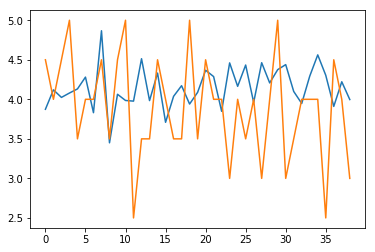

In [175]:
import matplotlib.pyplot as plt
plt.plot(predict_rate)
plt.plot(clean_rt[t_tr:])

In [131]:
len(predict_rate)

15

In [133]:
len(clean_rt[t_tr:])

15

In [177]:
L=np.load('user_imdb.npy')
print(L)

{'url': ['http://image.tmdb.org/t/p/w185/uMZqKhT4YA6mqo2yczoznv7IDmv.jpg', 'http://image.tmdb.org/t/p/w185/vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg', 'http://image.tmdb.org/t/p/w185/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg', 'http://image.tmdb.org/t/p/w185/eT79mN6LqeDXeLiKwDGmW9Py9Xc.jpg', 'http://image.tmdb.org/t/p/w185/e64sOI48hQXyru7naBFyssKFxVd.jpg', 'http://image.tmdb.org/t/p/w185/zMyfPUelumio3tiDKPffaUpsQTD.jpg', 'http://image.tmdb.org/t/p/w185/jQh15y5YB7bWz1NtffNZmRw0s9D.jpg', 'http://image.tmdb.org/t/p/w185/sGO5Qa55p7wTu7FJcX4H4xIVKvS.jpg', 'http://image.tmdb.org/t/p/w185/eoWvKD60lT95Ss1MYNgVExpo5iU.jpg', 'http://image.tmdb.org/t/p/w185/iHCNmXH2tat0NMqtUpqDMWjcza8.jpg', 'http://image.tmdb.org/t/p/w185/lymPNGLZgPHuqM29rKMGV46ANij.jpg', 'http://image.tmdb.org/t/p/w185/xve4cgfYItnOhtzLYoTwTVy5FGr.jpg', 'http://image.tmdb.org/t/p/w185/gV5PCAVCPNxlOLFM1bKk50EqLXO.jpg', 'http://image.tmdb.org/t/p/w185/cICkmCEiXRhvZmbuAlsA5D9B2rK.jpg', 'http://image.tmdb.org/t/p/w185/odM9973kIv9hcjfHPp6g6BlyTIJ.jpg', '

In [184]:
np.save('url_imdburl.npy',URL_IMDB['url'])
np.save('url_imdbimdb.npy',URL_IMDB['imdb'])

In [189]:
L=np.load('url_imdbimdb.npy')
print(L)

[114709 113497 113228 ... 106912 364517 391024]
